In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

# Importing data and libraries

In [1]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm

In [2]:
# assigning directory path 
os.chdir('/home/abhijeet/Desktop/extracted')


In [3]:
# creating sources for accesing path

source_path = '/home/abhijeet/Desktop/coswaraData'
data_path = '/home/abhijeet/Desktop/extracted'
extracted_csvs_path= "/home/abhijeet/Desktop/extracted/csvs"
print(extracted_csvs_path)

/home/abhijeet/Desktop/extracted/csvs


## preprocessing extracting and stabalizing dataset

In [4]:
# creating csv file from data depicting path and id of data
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
    hcough_files.extend(os.path.join(dirpath, x) for x in files if (x.endswith("heavy.wav") and os.path.isfile(os.path.join(dirpath, x))))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-44:-16] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-44:-16])
dff.head()

total files : 2313
path of file at loc [0] : /home/abhijeet/Desktop/extracted/20210630/iOx0zPyPiMZjCWXuf3RGu8HKq8k1/cough-heavy.wav
id of file at loc[0] iOx0zPyPiMZjCWXuf3RGu8HKq8k1


,id,path
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...


In [5]:
## one time run  only 

#  collecting csvs from coswara data 
# csv_files =[]
# for dirpath, subdirs, files in os.walk(source_path):
#     csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))


In [6]:
## one time run only

# moving files to csvs folder in extracted data 
# for file in csv_files :
#     if file not in os.listdir(extracted_csvs_path):
#         shutil.move(file , extracted_csvs_path)
#         print(f"moved {file[-12:]}")

In [5]:
print("total present csvs :", len(os.listdir(extracted_csvs_path)))
print("total expected csvs :" ,len(os.listdir(data_path))-1) # 1 folder of csvs 


total present csvs : 42
total expected csvs : 47


In [6]:
all_files=[]
for files in os.listdir('/home/abhijeet/Desktop/extracted/csvs'):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

### combining csvs to one final dataframe df

In [7]:
# change dir to csvs 
os.chdir(extracted_csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

,id,l_c,a,record_date,covid_status,iF,ep,g,l_s,dT,...,test_status,diarrhoea,ctScan,vacc,testType,test_date,others_preexist,ctDate,ctScore,others_resp
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,2020-04-13,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,2020-04-13,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,2020-04-13,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,2020-04-13,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,2020-04-13,healthy,True,y,male,Haryana,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

### feature engineering

In [9]:
# converting datatype of time into specific format 

df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(7)

,id,l_c,a,record_date,covid_status,iF,ep,g,l_s,dT,...,diarrhoea,ctScan,vacc,testType,test_date,others_preexist,ctDate,ctScore,others_resp,str_date
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,2020-04-13,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,2020-04-13,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,2020-04-13,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,2020-04-13,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,2020-04-13,healthy,True,y,male,Haryana,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
5,htQzROl26OWQpIYFDzv11F79PLR2,India,24,2020-04-13,healthy,True,y,male,Karnataka,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13
6,pW9mCAeWYiMoM7wW7riLvNRbYDO2,India,37,2020-04-13,healthy,True,y,male,Maharashtra,web,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-13


In [16]:
# df['wavfile']= "/gdrive/MyDrive/Covid-19 Cough/Data/Coswara-Data/Extracted_DATA"  + "/" + df['date'].astype(str)+"/" + df['id'].astype(str) + "/" +"cough-heavy.wav"

In [10]:
## final merge of dataframes with covid status labeles (df) + sound data path (dff)

tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [11]:
tdf.head()

,id,path,l_c,a,record_date,covid_status,iF,ep,g,l_s,...,diarrhoea,ctScan,vacc,testType,test_date,others_preexist,ctDate,ctScore,others_resp,str_date
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,India,39,2021-06-30,positive_mild,NaN,y,male,Tamil Nadu,...,NaN,n,n,rtpcr,2021-06-29,NaN,NaN,NaN,NaN,2021-06-30
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...,India,67,2021-06-28,positive_mild,NaN,n,male,Tamil Nadu,...,NaN,n,p,rtpcr,2021-06-25,NaN,NaN,NaN,NaN,2021-06-28
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...,India,59,2021-06-28,positive_mild,NaN,y,male,Tamil Nadu,...,NaN,n,p,rtpcr,2021-06-25,True,NaN,NaN,NaN,2021-06-28
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...,India,74,2021-06-28,positive_mild,NaN,n,female,Tamil Nadu,...,NaN,n,y,rtpcr,2021-06-24,NaN,NaN,NaN,NaN,2021-06-28
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,India,33,2021-06-28,positive_mild,NaN,y,male,Tamil Nadu,...,NaN,n,p,rtpcr,2021-06-23,NaN,NaN,NaN,NaN,2021-06-28


### testing the expectancy of audio files

In [12]:
data = librosa.load(tdf['path'].loc[12],sr = 22050)

In [13]:
import IPython.display as ipd

In [14]:
ipd.Audio(tdf['path'].loc[2])

no errors means everything looks great,
conclusion data is extracted without any difficulties
<br>
------

In [15]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [16]:
def feature_count(data):
    # missing values
    total_missing = data.isnull().sum().sort_values(ascending = False)
    percent_missing = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
    
    #unique values 
    total_data = data.count()
    tt = pd.DataFrame(total_data)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    unique = tt 
    return pd.concat([missing, unique], axis=1, keys=['Missing', 'UNIQUE'])

feature_count(tdf)

Missing            UNIQUE        
                  Total    Percent  Total Uniques
test               2311  99.956747      1       1
ihd                2286  98.875433     26       1
cld                2274  98.356401     38       1
diarrhoea          2272  98.269896     40       1
pneumonia          2268  98.096886     44       1
others_resp        2253  97.448097     59       1
iF                 2236  96.712803     76       1
others_preexist    2229  96.410035     83       1
asthma             2196  94.982699    116       1
loss_of_smell      2179  94.247405    133       1
ctScore            2178  94.204152    134      19
ctDate             2178  94.204152    134      68
bd                 2137  92.430796    175       1
st                 2125  91.911765    187       1
ht                 2121  91.738754    191       1
diabetes           2118  91.608997    194       1
mp                 2100  90.830450    212       1
ftg                2073  89.662630    239       1
fever              2064  89.273356    248       1
cold               1995  86.288927    317       1
cough              1891  81.790657    421       1
testType           1872  80.968858    440       3
test_date          1872  80.968858    440     147
ctScan             1783  77.119377    529       2
vacc               1783  77.119377    529       3
smoker             1660  71.799308    652       4
test_status        1413  61.115917    899       3
um                 1038  44.896194   1274       2
fV                  680  29.411765   1632       1
rU                  680  29.411765   1632       2
dT                  604  26.124567   1708       2
l_l                 251  10.856401   2061     720
id                    0   0.000000   2312    2312
path                  0   0.000000   2312    2312
date                  0   0.000000   2312     350
l_s                   0   0.000000   2312     151
g                     0   0.000000   2312       3
ep                    0   0.000000   2312       2
covid_status          0   0.000000   2312       7
record_date           0   0.000000   2312     350
a                     0   0.000000   2312      80
l_c                   0   0.000000   2312      52
str_date              0   0.000000   2312     350

In [17]:
tdf.covid_status.unique()

array(['positive_mild', 'positive_moderate', 'no_resp_illness_exposed',
       'healthy', 'positive_asymp', 'recovered_full',
       'resp_illness_not_identified'], dtype=object)

In [18]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 


/tmp/ipykernel_17343/1391514446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["status"].loc[i]='negative'


In [19]:
df["file_status"]= 0

for i in range( 0, 2312):
    if os.path.isfile(df["path"].loc[i]):
        df["file_status"].loc[i]="Y"
    if not os.path.isfile(df["path"].loc[i]):
        df["file_status"].loc[i]="N"


/tmp/ipykernel_17343/2027534232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["file_status"].loc[i]="Y"


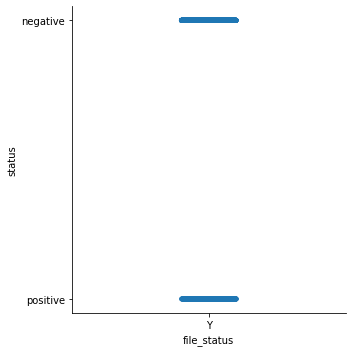

In [20]:
import seaborn as sns
sns.catplot(x='file_status',y='status',data=df)

In [21]:
df["status"].describe()

count         2312
unique           2
top       negative
freq          1829
Name: status, dtype: object

In [23]:
df.head()
df.to_csv("/home/abhijeet/Desktop/extracted/train_original.csv",index=False)

In [29]:
new_df = df[['id','path','file_status','covid_status','date','str_date','status']]

In [30]:
new_df.head()

,id,path,file_status,covid_status,date,str_date,status
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,Y,positive_mild,20210630,2021-06-30,positive
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...,Y,positive_mild,20210628,2021-06-28,positive
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...,Y,positive_mild,20210628,2021-06-28,positive
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...,Y,positive_mild,20210628,2021-06-28,positive
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,Y,positive_mild,20210628,2021-06-28,positive


In [32]:
new_df[new_df['status']=='positive'].count()

id              483
path            483
file_status     483
covid_status    483
date            483
str_date        483
status          483
dtype: int64

In [33]:
new_df.to_csv("/home/abhijeet/Desktop/extracted/train.csv",index=False)